In [1]:
import sys    
import csv    
import matplotlib.pyplot as plt    
from matplotlib.backends.backend_pdf import PdfPages    
import pandas as pd    
import seaborn as sns    
from os.path import basename    
from matplotlib import rcParams


In [2]:
data1 = "out.csv"
datait = pd.read_csv(data1, sep=r'\s+', header=None,
                     names=["mon", "traces_num", "input_len", "set_size", "traces_len", "verdict", "cputime", "walltime", "mem", "retcode"])

In [3]:
datait

mon  traces_num  input_len  set_size  traces_len verdict  cputime  \
0         mon           1          1     20.00   14.000000    True     0.00   
1       mon-m           1          1      4.00   14.000000   False     0.00   
2     mon-m-1           1          1       NaN   14.000000    True     0.00   
3         mon           4          1     30.25   14.000000    True     0.02   
4       mon-m           4          1       NaN   14.000000    True     0.00   
...       ...         ...        ...       ...         ...     ...      ...   
2155    mon-m        1024         10       NaN   49.436523     NaN      NaN   
2156  mon-m-1        1024         10      1.00   49.436523   False     3.52   
2157      mon        2048         10       NaN   49.448242     NaN      NaN   
2158    mon-m        2048         10       NaN   49.448242     NaN      NaN   
2159  mon-m-1        2048         10      1.00   49.448242   False     2.78   

      walltime        mem  retcode  
0         0.00   4.546875        0  
1         0.00   4.593750        1  
2         0.00   4.371094        0  
3         0.02   4.593750        0  
4         0.00   4.269531        0  
...        ...        ...      ...  
2155       NaN        NaN      -15  
2156      3.53  30.066406        1  
2157       NaN        NaN      -15  
2158       NaN        NaN      -15  
2159      2.78  30.800781        1  

[2160 rows x 10 columns]

In [4]:
datait[['input_len', 'traces_len']].groupby(["input_len"]).agg('mean')

traces_len
input_len            
1           13.484180
2           16.291935
4           24.516850
6           33.474320
8           40.532894
10          48.788196

In [5]:
#D = datait[datait['verdict'].isin((True, False))]
D = datait.fillna({'cputime': 30})
D[['input_len', 'cputime']].groupby("input_len").agg('mean')

cputime
input_len           
1           0.066889
2           0.455833
4           7.540889
6          14.667083
8          14.885722
10         17.230833

In [6]:
D=datait #[datait["mon"].isin(["mon-m", "mon-m-1"])]
#D['cputime'] = D['cputime'].fillna(value=30)
D = datait.fillna({'cputime': 30})

In [7]:
labels_map = {
    "mon": "All",
    "mon-m": "AAT",    
    "mon-m-1": "1W",    
}

def name_labels(legend):
    legend.set_title("")
    labels = legend.texts
    for l in labels:
        l.set_text(labels_map.get(l.get_text(), l.get_text()))

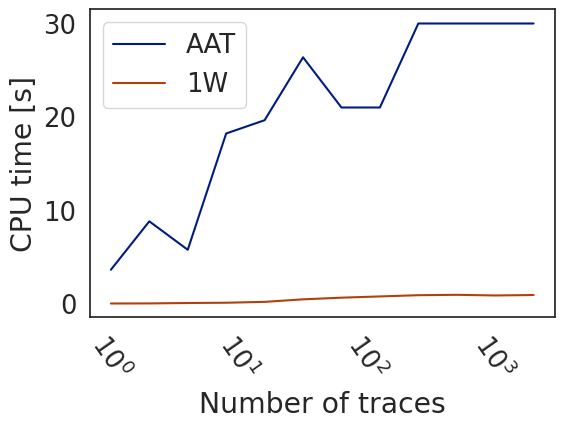

In [18]:
sns.set()
sns.set_theme(style="white", font_scale=1.7,)


rcParams['figure.figsize'] = 6,4

g = sns.lineplot(
    data=D[(D["input_len"] == 8) & D['mon'].isin(("mon-m", "mon-m-1"))],
    x="traces_num", y="cputime", hue="mon",
    #gap=0.3, saturation=1, boxprops=dict(alpha=.6),
    palette="dark",# alpha=.6, height=4, aspect=2.5
    errorbar=None
)
#plt.yscale('symlog')
#g.set_axis_labels("Input length", "Number of traces")
#g.legend().set_title("Monitor")
name_labels(g.legend())
#labels[0].set_text("1W")
#labels[1].set_text("AAT")
plt.xlabel("Number of traces")
plt.ylabel("CPU time [s]")
plt.xticks(rotation=-55)
plt.xscale("log")
plt.savefig('cputime-inp-1.pdf',bbox_inches='tight', dpi=600)


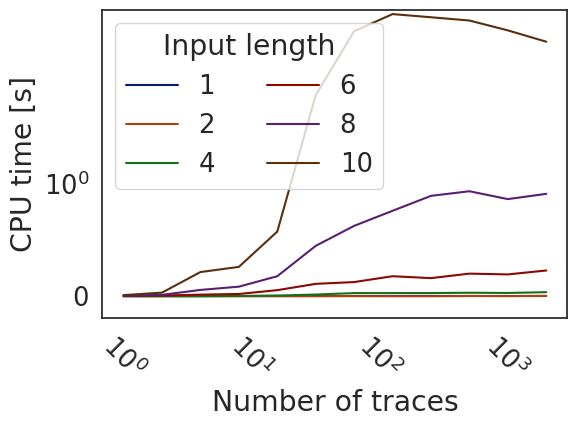

In [28]:
sns.set()
sns.set_theme(style="white", font_scale=1.7,)


rcParams['figure.figsize'] = 6,4

g = sns.lineplot(
    data=D[(D["mon"] == 'mon-m-1') & (D['input_len'] <= 10)],
    x="traces_num", y="cputime", hue="input_len", # boxprops=dict(alpha=.6),
    palette="dark", errorbar=None # alpha=.6, height=4, aspect=2.5
)
plt.yscale('symlog')
plt.xscale('log')
#g.set_axis_labels("Input length", "Number of traces")

plt.legend(ncol=2, title="Input length")
# sns.move_legend(g, loc='upper right')
#labels = g.legend().texts
#labels[0].set_text("1W")
#labels[1].set_text("AAT")
plt.xlabel("Number of traces")
plt.ylabel("CPU time [s]")
plt.xticks(rotation=-45)
plt.savefig('cputime.pdf',bbox_inches='tight', dpi=600)